In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%load_ext autoreload
%autoreload 2

<music21.pitch.Pitch F4>

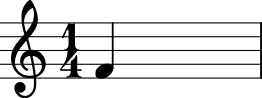

In [51]:
import music21 as m2
a = m2.note.Note('F4')
# dir(a)
a.pitch
a.show()

In [2]:
import sys
sys.path.insert(0, "../")
import guitarHarmony as gt
print(gt.__version__)
from itertools import product
import random

SyntaxError: invalid syntax (chord.py, line 55)

In [53]:
note = None
# note = 'F-b4'
note if not note else note.replace('b', '-')
note.replace('b','-') if note is not None else None

('C', <music21.pitch.Pitch C4>, 4)

(None,)

(<music21.duration.Duration 1.0>, 1.0)

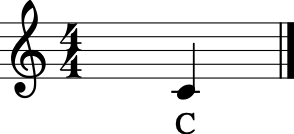

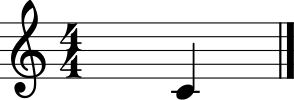

In [55]:
a=gt.Note()
a.name, a.pitch, a.octave
a.pitch.accidental, 
a.duration, a.duration.quarterLength
a.show('notation')
a.show('midi')
a.show('')

In [47]:
a=gt.Note('F5')
a.name, a.pitch, a.octave, a.pitch.accidental, 
a.duration, a.duration.quarterLength
a.show()
a.show('midi')
a

('F', <music21.pitch.Pitch F5>, 5, None)

(<music21.duration.Duration 1.0>, 1.0)

NameError: name 'Stream' is not defined

In [8]:
import guitarHarmony as gt
a=gt.Note('F4')
a.name, a.pitch, a.octave, a.pitch.accidental, 
a.duration, a.duration.quarterLength
# a.show()
# a.show('midi')
a
b=gt.Note('F4')
b=gt.Note('F-5')
b=gt.Note('E-5')
b
a==b
b.semiSteps()
# for s in ['C3', 'D###3', 'E5', 'F', 'G', 'A', 'B']:
# #     a = m2.note.Note(s)
# #     print(a, a.octave)
#     a = gt.Note(s)
#     a, a.semiSteps()
s = 'Cb5'
s
a = gt.Note(s)
a.simplify()
steps = a.semiSteps()
steps
# octave, residual = steps // 12, steps % 12
# octave, residual
# step_to_tone = {0:'C', 1:'C#,Db', 2:'D', 3:'D#,Eb', 4:'E', 5:'F', 
#                     6:'F#,Gb',7:'G',8:'G#,Ab',9:'A',10:'A#,Bb', 11:'B'}
# step_to_tone[residual].split(',')[0]


('F', <music21.pitch.Pitch F4>, 4, None)

(<music21.duration.Duration 1.0>, 1.0)

Note(F4)

Note(Eb5)

False

15

'Cb5'

Note(B4)

11

In [9]:
# a.transpose(3, inPlace=True)
# a.transpose(3)
# a.name
import guitarHarmony as gt
a=gt.Note('F4')
# a.addNotation()
# a.show()
# a.removeNotation()
# a.show('notation')
# a.show()
# print(dir(a.note))
# a.insertLyric('fd')
# a.lyric
# a.show()
a.transpose(3)
a
a.transpose(-2)
a = m2.note.Note('F4')
b = m2.note.Note('C---5')
a.octave, b.octave
a, b
a.step, b.step
b.pitch.accidental.alter
b.pitch.accidental.displaySize
# a.pitch.accidental, dir(b.pitch.accidental),

Note(G#4)

Note(F4)

Note(Eb4)

(4, 5)

(<music21.note.Note F>, <music21.note.Note C--->)

('F', 'C')

-3.0

'full'

In [11]:
import guitarHarmony as gt
for intv in gt.Interval.displayAllIntervals():
    gt.Interval(intv).show('midi')
    break

# a = gt.Interval('A2')
# b = gt.Interval('m9')
# a = gt.Note('C')
# # a, b
# # a == b
# # a.allIntervals()
# # a = gt.Note('D#')
# # names = ['C', 'C#', 'Db', 'D', 'D#', 'Eb', 'E', 'F', 'F#', 'Gb', 'G', 'G#', 'Ab', 'A', 'A#', 'Bb', 'B', 'C5']
# # # a.semiSteps(), b.semiSteps()
# # for name in names:
#     # b = gt.Note(name)
#     # a, b, gt.Interval.getIntervals(a, b)
    
    
# b.show()
# b.show('midi')
# b.show('text', base='D5#')
# b.show('notation', base='D6#')
# a.show('notation')

In [14]:
import guitarHarmony as gt
note = 'C-b'
gt.Note(note)
# gt.Interval.applyInterval(note,'A7')
# for i in gt.Interval.allIntervals():
#     gt.Note(note), i, gt.Interval.applyInterval(note, i)

Note(Cbb4)

In [235]:
import guitarHarmony as gt
root='C'
chord_type='7'
chord = gt.Chord(root, chord_type)
chord.notes

root = 'CDEFGAB'
for t in gt.Chord.displayAllChords():
    gt.Chord('C',chord_type=t).arpeggio

# for i in range(4):
#     chord.getInversion(i).show('notation')
# chord.getArpeggios()

[Note(C), Note(E), Note(G), Note(Bb)]

<music21.stream.Stream 0xa1c271e10>

<music21.stream.Stream 0xa1c271588>

<music21.stream.Stream 0xa1c1f8198>

<music21.stream.Stream 0xa1c271048>

<music21.stream.Stream 0xa1c1f8400>

<music21.stream.Stream 0xa1c2716d8>

<music21.stream.Stream 0xa1c2309e8>

<music21.stream.Stream 0xa1bc554e0>

<music21.stream.Stream 0xa1bb19400>

<music21.stream.Stream 0xa1c265358>

<music21.stream.Stream 0xa1bc558d0>

<music21.stream.Stream 0xa1bc29898>

<music21.stream.Stream 0xa1c1f8198>

<music21.stream.Stream 0xa1c265ac8>

<music21.stream.Stream 0xa1c203780>

<music21.stream.Stream 0xa1bc29898>

In [165]:
class Test(object):
    def __init__(self, a=1, add=True):
        self.a = a
        if add:
            self.a += 1
    def __repr__(self):
        return str(self.a)
v = Test(a=1, add=True)
v

2

[Note(Ab3), Note(C), Note(Eb), Note(G)]

[Note(C), Note(Eb), Note(G), Note(Ab)]

[Note(Eb), Note(G), Note(Ab), Note(C5)]

[Note(G), Note(Ab), Note(C5), Note(Eb5)]

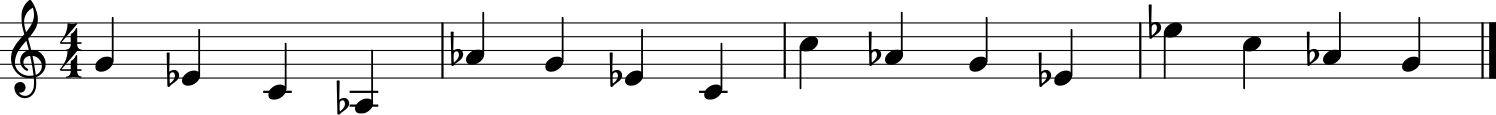

[Note(G), Note(Eb), Note(C), Note(Ab3), Note(Ab), Note(G), Note(Eb), Note(C), Note(C5), Note(Ab), Note(G), Note(Eb), Note(Eb5), Note(C5), Note(Ab), Note(G)]


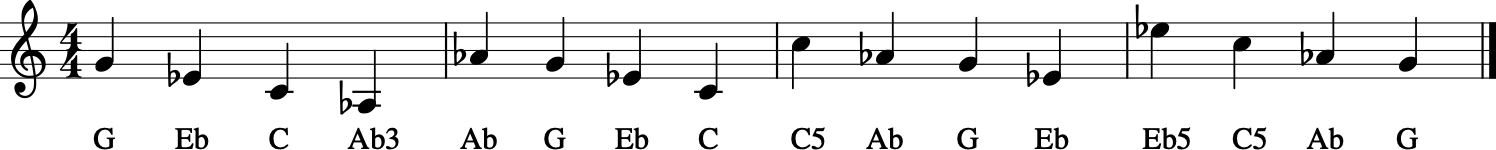

In [84]:
import guitarHarmony as gt
# a = gt.Note('Fb')
# a.show('text')
# a.show('notation')
# a.show('midi')
# a.show('')
# a = gt.Interval('A9')
# a.show('text')
# a.show('notation')
# a.show('midi')
# a.show('')
chords = []
for i in range(4):
	a = gt.Chord('Ab3', 'maj7', i)
	# a.arpeggio
	# chords.extend(a.arpeggio)
	chords.extend(a.arpeggio[::-1])
s = gt.Stream(chords)
# s.show('')
# s.show('text')
s.show('notation')
# s.show('midi')
# s.show('')

In [ ]:
import guitarHarmony1 as gt
gt.Note('')
note = ''
bool(re.match("[A-G](#{0,4}|(b|-){0,4})[1-9]", note))
bool(re.match("[A-G](#{0,4}|b{0,4})[1-9]", 'A#b2'))

In [ ]:
def getChord(root, chord_type):
    return list(map(str,gt.chord.Chord(root, chord_type).notes))

In [ ]:
getChord('C','maj7')
getChord('B','m')

In [ ]:
a=gt.note.Note('C4')
str(a)

In [ ]:
list(map(str, gt.chord.Chord('A').notes))
list(map(str, gt.chord.Chord('B','dim').notes))

In [ ]:
def getInterval(root='C', interval='P1'):
    return [str(gt.note.Note(root)+gt.interval.Interval(interval))]

In [ ]:
getInterval('D##','P4')